In [1]:
import pandas as pd
import numpy as np
ds=pd.read_csv('titanic.csv')

import seaborn as sns
ds

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
ds.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
ds.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
import scipy

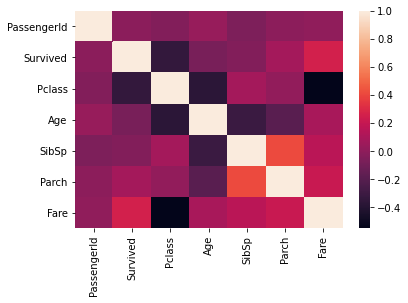

In [5]:
corr_hmap=ds.corr()
sns.heatmap(corr_hmap)

In [6]:
# we can drop passenger id, name, ticket, fare, embarked

In [7]:
ds=ds.drop(['PassengerId','Name','Ticket','Fare','Cabin','Embarked'],axis=1)

In [8]:
ds

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0
...,...,...,...,...,...,...
886,0,2,male,27.0,0,0
887,1,1,female,19.0,0,0
888,0,3,female,NaN,1,2
889,1,1,male,26.0,0,0


In [9]:
from sklearn.preprocessing import LabelEncoder

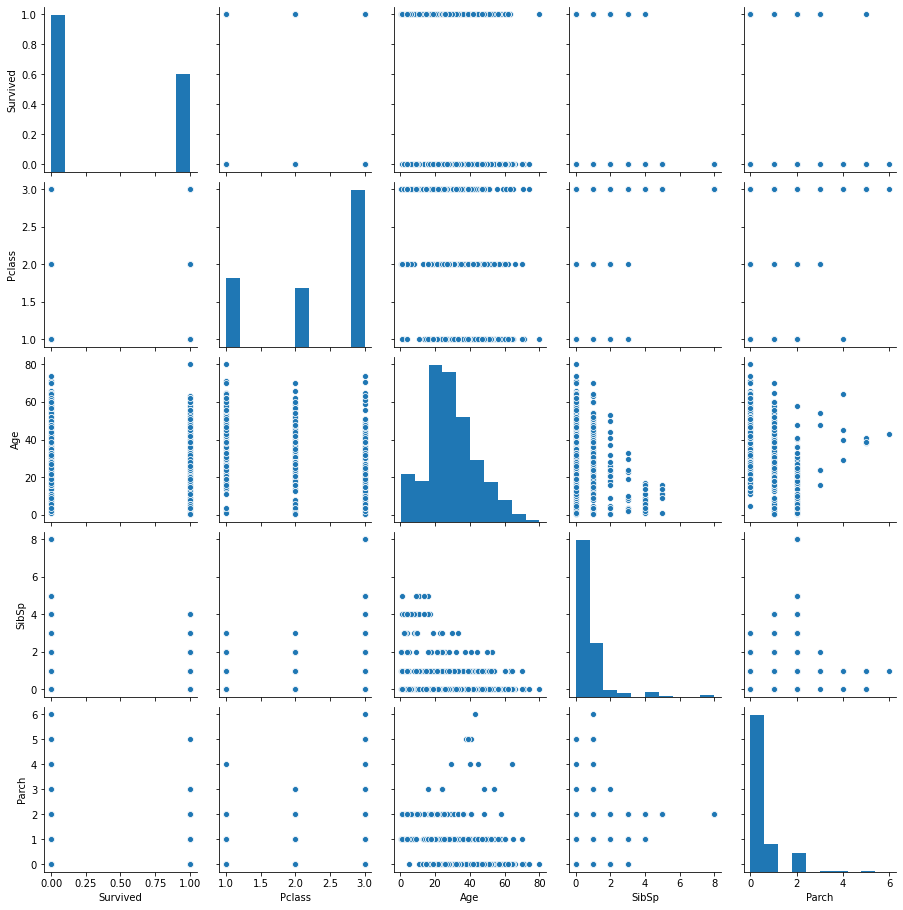

In [10]:
sns.pairplot(ds)

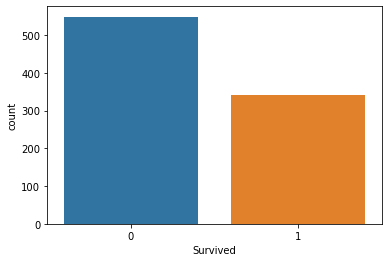

In [11]:
sns.countplot(ds['Survived'])

In [12]:
ds['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [13]:
ds['Sex']=LabelEncoder().fit_transform(ds['Sex'])

In [14]:
ds['Age'].fillna(ds['Age'].mean(), inplace=True)

In [15]:
ds['Age']=ds['Age'].astype(np.int64)
ds['Sex']=ds['Sex'].astype(np.int64)

In [16]:
ds.dtypes

Survived    int64
Pclass      int64
Sex         int64
Age         int64
SibSp       int64
Parch       int64
dtype: object

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [18]:
x=ds.iloc[:,1:]
y=ds.iloc[:,:1]
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [19]:
lr=LogisticRegression()
max_ac_score=0
for r_state in range(35,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y, random_state=r_state, test_size=0.20)
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    acc_score=accuracy_score(y_test,predlr)
    if acc_score>max_ac_score:
        max_ac_score=acc_score
        final_rs=r_state
print('max accuracy score corrosponding to' ,final_rs ,'is', max_ac_score)

max accuracy score corrosponding to 89 is 0.8435754189944135


we are gpoing to use random state 89

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
dtc=DecisionTreeClassifier()
dtc_para= {'criterion': ['gini' , 'entropy']}

dtcgd=GridSearchCV( estimator=dtc ,param_grid=dtc_para ,scoring='accuracy' ,cv=5)
dtcgd.fit(x,y)
best_para=dtcgd.best_params_
best_score=dtcgd.best_score_
print(best_para)
print(best_score)

{'criterion': 'gini'}
0.8058627832527776


In [22]:
dtc=DecisionTreeClassifier(criterion='gini')
max_ac_score=0
for r_state in range(35,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y, random_state=r_state, test_size=0.20)
    dtc.fit(x_train,y_train)
    preddtc=dtc.predict(x_test)
    acc_score=accuracy_score(y_test,preddtc)
    if acc_score>max_ac_score:
        max_ac_score=acc_score
        final_rs=r_state
print('max accuracy score corrosponding to' ,final_rs ,'is', max_ac_score)

max accuracy score corrosponding to 45 is 0.8547486033519553


max accuracy score corrosponding to 45 is 0.8715083798882681

In [23]:
sv=SVC()
sv_para={'kernel' : ['linear', 'rbf', 'poly'], 'C':[1,10]}
svgd=GridSearchCV(sv ,sv_para)
svgd.fit(x,y)
print(svgd.best_params_)

{'C': 10, 'kernel': 'rbf'}


In [27]:
max_ac_score=0
svc=SVC(kernel='rbf',C=10)
for r_state in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y, random_state=r_state, test_size=0.20)
    svc.fit(x_train,y_train)
    predsvc=svc.predict(x_test)
    acc_score=accuracy_score(y_test,predsvc)
    if acc_score>max_ac_score:
        max_ac_score=acc_score
        final_svc=r_state
print('max accuracy score corrosponding to' ,final_svc ,'is', max_ac_score)


max accuracy score corrosponding to 56 is 0.8994413407821229


In [28]:
svc=SVC(kernel='rbf', C=10)
x_train,x_test,y_train,y_test=train_test_split(x,y, random_state=56, test_size=0.20)
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(svc.score(x_train,y_train))
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8061797752808989
0.8994413407821229
[[111   5]
 [ 13  50]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       116
           1       0.91      0.79      0.85        63

    accuracy                           0.90       179
   macro avg       0.90      0.88      0.89       179
weighted avg       0.90      0.90      0.90       179



In [29]:
from sklearn.model_selection import cross_val_score
cross_val_score(svc,x,y,cv=5).mean()

0.8136651810934655

In [30]:
import joblib
joblib.dump(svc,"titanic.pkl")

['titanic.pkl']